In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
train = pd.read_csv("data/train.csv", index_col="Id")
test = pd.read_csv("data/test.csv", index_col="Id")
submission = pd.read_csv(f'data/sample_submission.csv', index_col="Id")
train.shape, test.shape, submission.shape

((1460, 80), (1459, 79), (1459, 1))

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [5]:
train.isnull().sum().describe()

count      80.000000
mean       97.862500
std       316.817871
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1453.000000
dtype: float64

<Axes: >

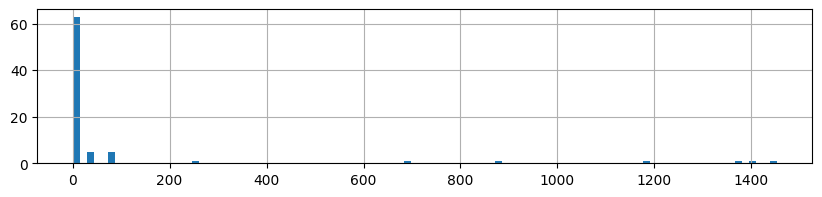

In [6]:
# 결측치 수 분포
train.isnull().sum().hist(bins=100, figsize=(10, 2))

<Axes: ylabel='Id'>

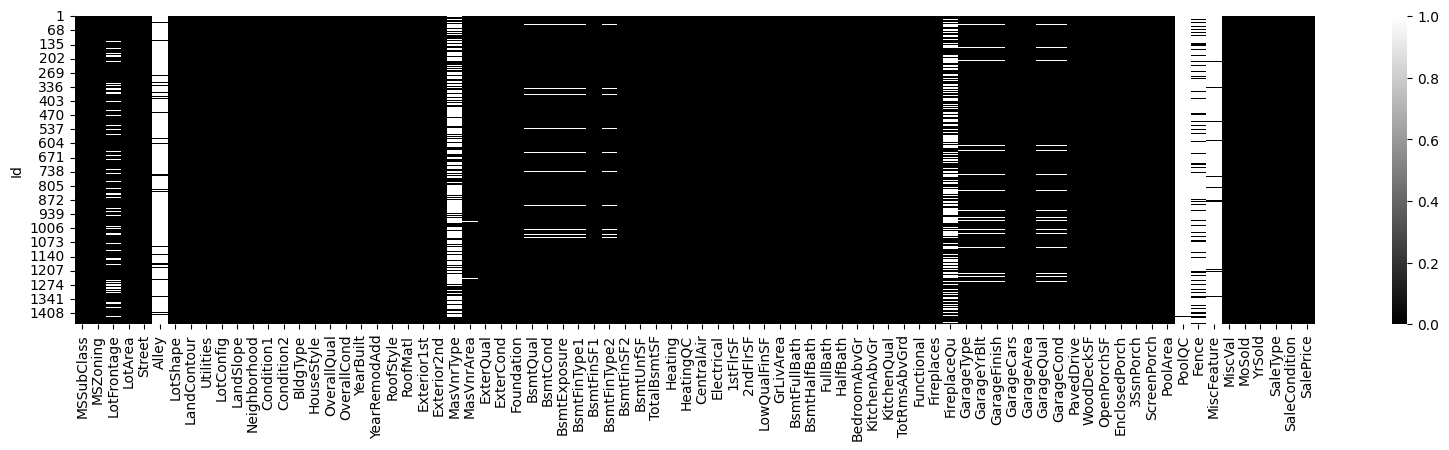

In [7]:
plt.figure(figsize=(20, 4))
sns.heatmap(train.isnull(), cmap="gray")

In [8]:
category_cols = train.select_dtypes(exclude="number").columns
train[category_cols] = train[category_cols].astype("category")
test[category_cols] = test[category_cols].astype("category")

In [9]:
label_name = "SalePrice"
X = train.drop(columns=label_name)
y = train[label_name]

X.shape, y.shape

((1460, 79), (1460,))

In [10]:
category_cols = X.select_dtypes(exclude="number").columns
category_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
      (StandardScaler(),
       make_column_selector(dtype_include=np.number)),
      (OneHotEncoder(handle_unknown="ignore"),
       make_column_selector(dtype_include="category")))

X_train_ct = ct.fit_transform(X_train)  
X_valid_ct = ct.transform(X_valid)    
test_ct = ct.transform(test)  

X_train_ct.shape, X_valid_ct.shape, test_ct.shape

((1168, 301), (292, 301), (1459, 301))

In [13]:
df_train = pd.DataFrame(X_train_ct.toarray(), columns=ct.get_feature_names_out())
df_train.shape

(1168, 301)

In [14]:
df_train.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,301.000000,3.010000e+02,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1167.046512,1.428571e-01,0.290791,-0.191768,0.013052,0.091418,0.226452,1.745014
std,13.031673,2.686282e-01,0.293261,0.681052,0.377093,0.344869,0.410744,2.820125
min,951.000000,-2.925196e-15,0.029260,-4.650263,-1.106774,-0.818694,-0.351921,1.000000
25%,1168.000000,2.568493e-03,0.087479,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1168.000000,2.311644e-02,0.186267,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1168.000000,9.589041e-02,0.359559,0.000000,0.000000,0.000000,0.351871,1.000000
max,1168.000000,9.991438e-01,1.000526,0.000000,1.000000,1.000000,1.236947,27.946187


In [15]:
df_train.nunique().describe()

count    301.000000
mean      23.136213
std      104.855510
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max      890.000000
dtype: float64

<Axes: >

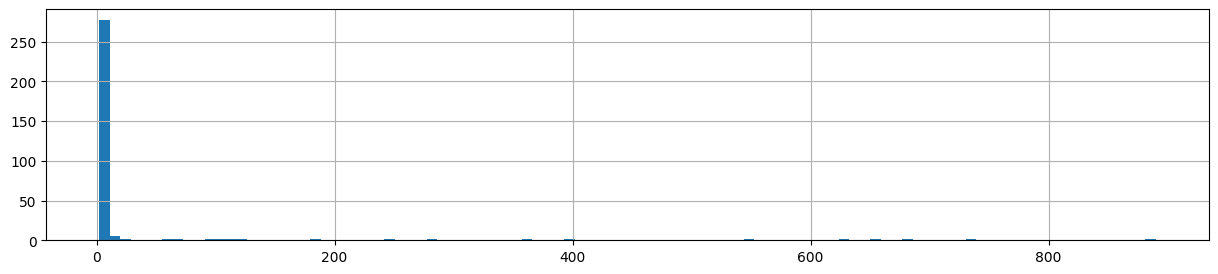

In [16]:
df_train.nunique().hist(bins=100, figsize=(15, 3))

In [17]:
# HistGradientBoostingRegressor 는 결측치가 있어도 동작
df_train.isnull().sum().sum()

287

In [18]:
# categorical_features : array-like of {bool, int} of shape (n_features)             
# or shape (n_categorical_features,), default=None
#     Indicates the categorical features.
#     - None : no feature will be considered categorical.
#     - boolean array-like : boolean mask indicating categorical features.
#     - integer array-like : integer indices indicating categorical
#       features.
#     For each categorical feature, there must be at most `max_bins` unique
#     categories, and each categorical value must be in [0, max_bins -1].
#     Read more in the :ref:`User Guide <categorical_support_gbdt>`.
#     .. versionadded:: 0.24
# HistGradientBoostingRegressor 모델 초기화 및 학습
model = HistGradientBoostingRegressor()

model.fit(X_train_ct.toarray(), y_train)

HistGradientBoostingRegressor()

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_valid_ct.toarray(), y_valid).mean()

0.793288438532455

In [23]:
y_val_predict = model.predict(X_valid_ct.toarray())

((y_valid - y_val_predict) ** 2).mean() ** 0.5

29226.963898684844

In [21]:
# 테스트 세트 예측
y_predict = model.predict(test_ct.toarray())

# 결과 출력
y_predict.shape

(1459,)